## Usage
* Change the `res` to file name
* Change the `res_name` to the name of the Restaurant
* Run all
* A plot for trends will be saved in the images directory with fname
* Thank you and looking forward to the appraisal

In [47]:
res_name = 'test restaurent' 
res = 'wicked_reviews'
fname = '{}.html'.format(res)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from nltk.sentiment import vader
from scipy.stats import pearsonr 

In [35]:
df = pd.read_html(fname, header=0)[0]
df['date'] = pd.to_datetime(df['date'])

In [36]:
df.describe()

,stars,useful,funny,cool
count,4607.000000,4607.000000,4607.000000,4607.000000
mean,3.749077,1.638811,0.826785,0.948557
std,1.126009,3.599796,2.569223,2.820695
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,0.000000,0.000000
75%,5.000000,2.000000,1.000000,1.000000
max,5.000000,58.000000,44.000000,52.000000


In [37]:
df.dtypes

id                     object
business_id            object
user_id                object
stars                   int64
date           datetime64[ns]
text                   object
useful                  int64
funny                   int64
cool                    int64
dtype: object

In [38]:
senti = vader.SentimentIntensityAnalyzer()
df["sentiment"] = df["text"].apply(lambda x: senti.polarity_scores(x)["compound"])

In [39]:
print("Pearsons coeff", round(pearsonr(df["sentiment"], df["stars"])[0], 2))

Pearsons coeff 0.43


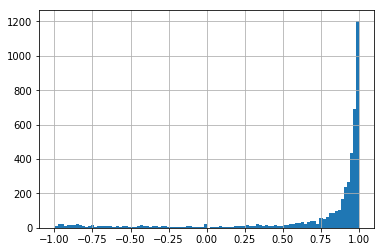

In [40]:
df["sentiment"].hist(bins=100)

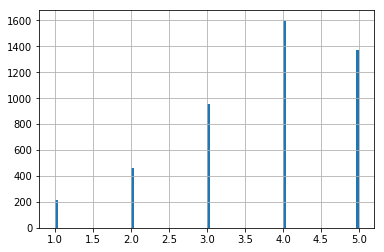

In [41]:
df["stars"].hist(bins=100)

In [43]:
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
df = df[df['year'] >= 2015]
mean_stars = df.groupby(['year', 'month'], as_index=False).mean()
mean_stars1 = df.groupby(['year', 'month'], as_index=False)[['stars', 'sentiment']].agg({"mean_score": "mean"})

/Users/pulkitmaloo/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [44]:
mean_final = mean_stars[['year', 'month', 'sentiment', 'stars']]
mean_final['period'] = mean_final['year'].astype('str').str.cat(mean_final['month'].astype('str'), sep='-')

scaler = StandardScaler()
mean_final['stars'] = scaler.fit_transform(np.expand_dims(mean_final['stars'], axis=1))
mean_final['sentiment'] = scaler.fit_transform(np.expand_dims(mean_final['sentiment'], axis=1))
mean_final.head()

/Users/pulkitmaloo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/pulkitmaloo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/pulkitmaloo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

,year,month,sentiment,stars,period
0,2015,1,-0.419658,-0.927692,2015-1
1,2015,2,-0.585959,0.158441,2015-2
2,2015,3,-1.024817,-0.025529,2015-3
3,2015,4,1.027230,1.321468,2015-4
4,2015,5,-0.219760,0.788929,2015-5


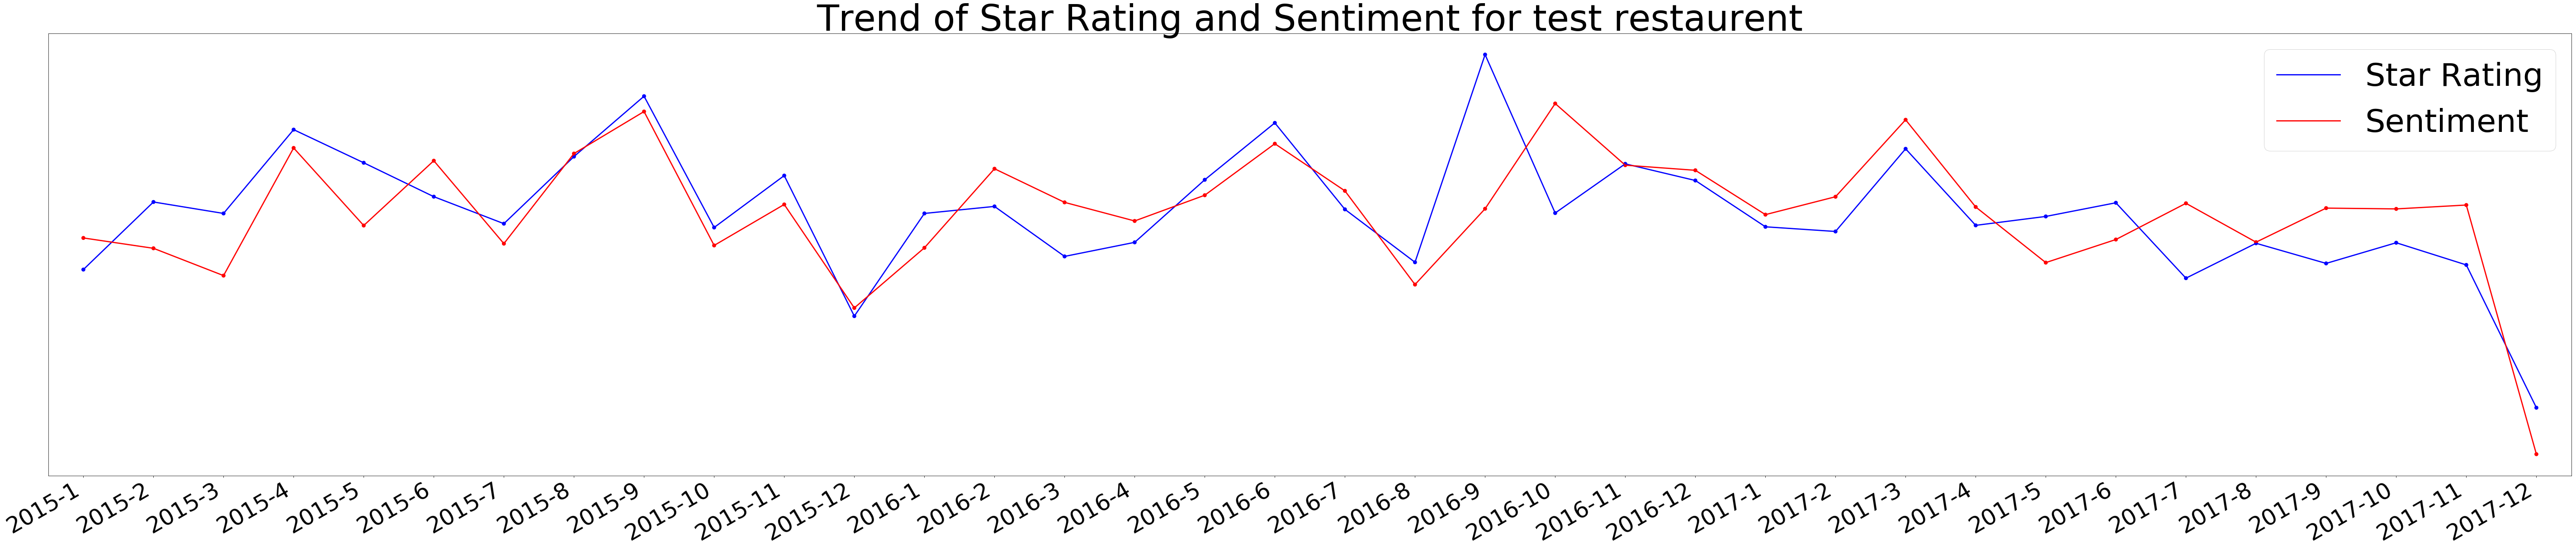

In [49]:
f, ax = plt.subplots(figsize=(100, 20))
#plt.figure()
x_col = 'period'

sns.pointplot(ax=ax, x=x_col, y='stars', data=mean_final, color='blue')
sns.pointplot(ax=ax, x=x_col, y='sentiment', data=mean_final, color='red')

plt.yticks([])
plt.ylabel('')
plt.xlabel('')

ax.legend(handles=ax.lines[::len(mean_final)+1], labels=["Star Rating", "Sentiment"], fontsize=70)

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
plt.tick_params(labelsize=50)

plt.gcf().autofmt_xdate()

plt.title('Trend of Star Rating and Sentiment for ' + res_name, fontsize=80)
plt.savefig("images/" + res)

In [46]:
pearsonr(mean_final['stars'], mean_final['sentiment'])[0]

0.715190063657887